In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Data preprocessing
**Steps:**
- **Import the dataset.**
- **Handle missing data.**
- **Encode categorical data into numerical data.**
- **Split dataset into training set & test set.**
- **Apply feature scaling.**


In [2]:
# importing the dataset
dataset = pd.read_csv('Datasets/50_Startups.csv')
dataset.sample(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
18,91749.16,114175.79,294919.57,Florida,124266.90
6,134615.46,147198.87,127716.82,California,156122.51
38,20229.59,65947.93,185265.10,New York,81229.06
3,144372.41,118671.85,383199.62,New York,182901.99
22,73994.56,122782.75,303319.26,Florida,110352.25


In [3]:
# converting categorical data into numerical data
state_dummies = pd.get_dummies(dataset['State'], drop_first = True)

# drop the column with categorical data
dataset.drop(labels = ['State'], axis = 1, inplace = True)

# add newly generated numerical data (dummy variables) to the dataset
dataset = pd.concat([state_dummies, dataset], axis = 1)
dataset.sample(5)

,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
4,1,0,142107.34,91391.77,366168.42,166187.94
12,1,0,93863.75,127320.38,249839.44,141585.52
19,0,1,86419.70,153514.11,0.00,122776.86
30,1,0,61994.48,115641.28,91131.24,99937.59
37,0,0,44069.95,51283.14,197029.42,89949.14


## Multiple Linear Regression

$$ y = b_{0}X_{0} + b_{1}X_{1} + ... + b_{n}X_{n} $$ where, <br>$ X_{0} = 1 $ <br>$X_{1}, X_{2}, .... , X_{n}$ are Features

**Process:**

- **Generate potential independent varialbles(X) & dependent variable(y) from dataset.**
- **Check the relationship between each independent variable(X) & dependent variable(y) using scatterplot & correlation checker. If there is no strong linearity exists between a independent variable$(X_{n})$ and dependent variable(y), then don't add that independent variable$(X_{n})$ to the model.**
- **Similarly, check the relationship among the independent variables(X). If a independent variable$(X_{n})$ shows strong linearity with another independent variable$(X_{m})$, then, don't add both of the independent variables to the model. Otherwise, they will arise multi colinearity issue: model gets confused while updating parameters because it finds two of the variables are same.**
- **Conduct simple linear regression for each independent variables $(X_{n})$ & dependent variable(y) pair.** **(OPTIONAL)**
- **Use the non-redundant independent variables(X) in the analysis to find the best fitting model**
- **Use the best fitting model to make predictions about the dependetn variable(y)**

In [4]:
# dependent variable : y
profit = dataset['Profit'].values

# independent variables : X
florida = dataset['Florida'].values
new_york = dataset['New York'].values
r_and_d = dataset['R&D Spend'].values
admin = dataset['Administration'].values
marketing = dataset['Marketing Spend'].values

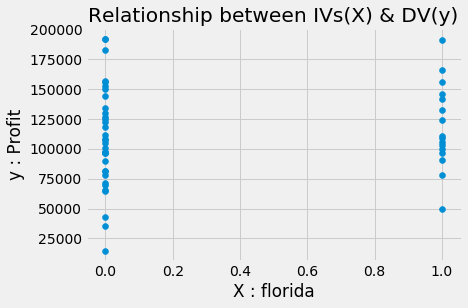

In [5]:
# checking the relationship between independent variable(Florida) & dependent variable(Profit)
plt.scatter(florida, profit)
plt.title('Relationship between IVs(X) & DV(y)')
plt.xlabel('X : florida')
plt.ylabel('y : Profit')
plt.show()

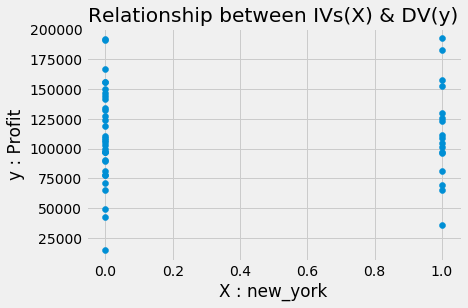

In [6]:
# checking the relationship between independent variable(new york) & dependent variable(Profit)
plt.scatter(new_york, profit)
plt.title('Relationship between IVs(X) & DV(y)')
plt.xlabel('X : new_york')
plt.ylabel('y : Profit')
plt.show()

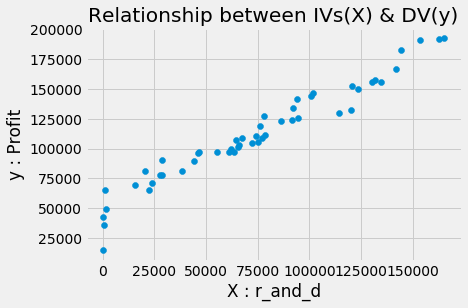

In [7]:
# checking the relationship between independent variable(R&D) & dependent variable(Profit)
plt.scatter(r_and_d, profit)
plt.title('Relationship between IVs(X) & DV(y)')
plt.xlabel('X : r_and_d')
plt.ylabel('y : Profit')
plt.show()

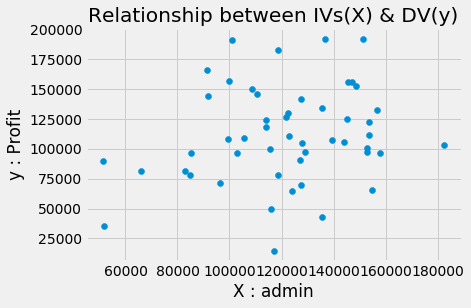

In [8]:
# checking the relationship between independent variable(Administration) & dependent variable(Profit)
plt.scatter(admin, profit)
plt.title('Relationship between IVs(X) & DV(y)')
plt.xlabel('X : admin')
plt.ylabel('y : Profit')
plt.show()

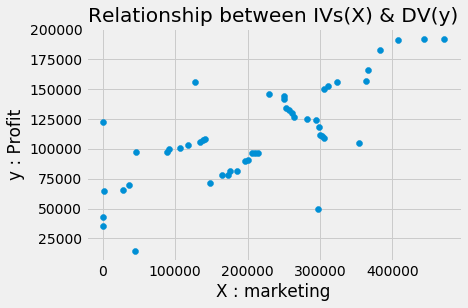

In [9]:
# checking the relationship between independent variable(Marketing) & dependent variable(Profit)
plt.scatter(marketing, profit)
plt.title('Relationship between IVs(X) & DV(y)')
plt.xlabel('X : marketing')
plt.ylabel('y : Profit')
plt.show()

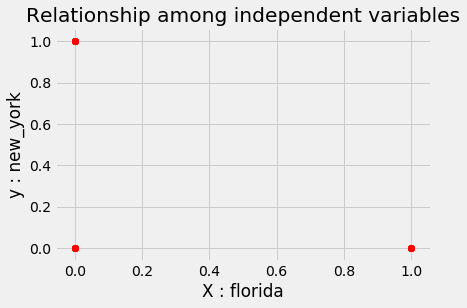

In [10]:
# checking the relationship among independent variable(florida) & independent variable(new_york)
plt.scatter(florida, new_york, color = 'red')
plt.title('Relationship among independent variables')
plt.xlabel('X : florida')
plt.ylabel('y : new_york')
plt.show()

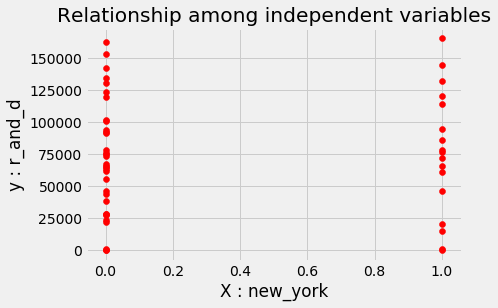

In [11]:
# checking the relationship among independent variable(new_york) & independent variable(r_and_d)
plt.scatter(new_york, r_and_d, color = 'red')
plt.title('Relationship among independent variables')
plt.xlabel('X : new_york')
plt.ylabel('y : r_and_d')
plt.show()

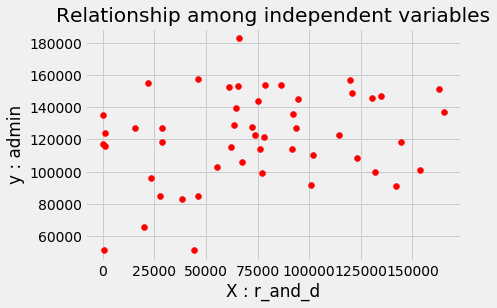

In [12]:
# checking the relationship among independent variable(r_and_d) & independent variable(admin)
plt.scatter(r_and_d, admin, color = 'red')
plt.title('Relationship among independent variables')
plt.xlabel('X : r_and_d')
plt.ylabel('y : admin')
plt.show()

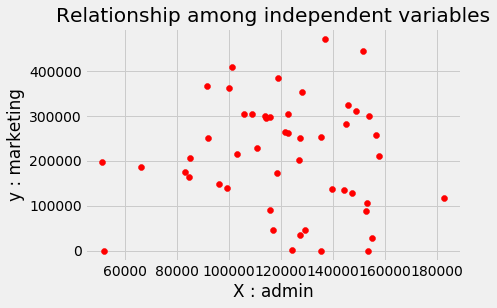

In [13]:
# checking the relationship among independent variable(admin) & independent variable(marketing)
plt.scatter(admin, marketing, color = 'red')
plt.title('Relationship among independent variables')
plt.xlabel('X : admin')
plt.ylabel('y : marketing')
plt.show()

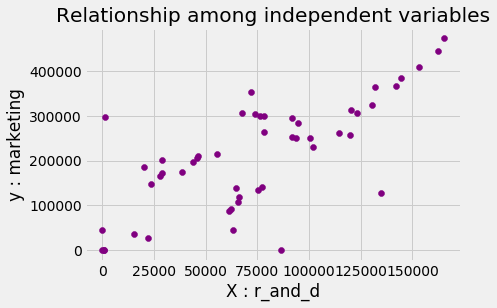

In [14]:
# from above relationships, we can see that marketing column and r&d column show strong linearity with dependent variable.
# so we should add these two variable to our model. but before adding them to model we need to check multi colinearity.
# checking the relationship among independent variable(admin) & independent variable(marketing)
plt.scatter(r_and_d, marketing, color = 'purple')
plt.title('Relationship among independent variables')
plt.xlabel('X : r_and_d')
plt.ylabel('y : marketing')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 2:3].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1024)

In [16]:
from sklearn.linear_model import LinearRegression

# creating an instance of linear regression
regressor = LinearRegression()
# fitting our training data to regressor
regressor.fit(X_train, y_train)

# prediction on test data
y_pred = regressor.predict(X_test)

In [17]:
# showing y_true and y_predicted value side by side
pd.DataFrame(list(zip(y_test, y_pred)), columns = ['y_true', 'y_pred'])

,y_true,y_pred
0,118474.03,114880.866384
1,96479.51,89824.329521
2,166187.94,169446.636217
3,111313.02,116650.419090
4,103282.38,106427.273101
5,191050.39,178838.056556
6,78239.91,75523.061434
7,132602.65,151081.605559
8,14681.40,51697.408599
9,192261.83,188704.691877


In [18]:
from sklearn.metrics import r2_score

# calculating R-squared value to evaluate our model
r2_score(y_test, y_pred)

0.9244658072363383

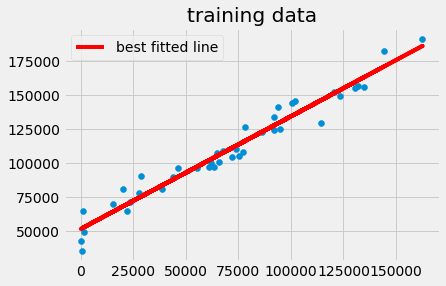

In [19]:
# showing best fitted line on training data
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red', label = 'best fitted line')
plt.title('training data')
plt.legend()
plt.show()

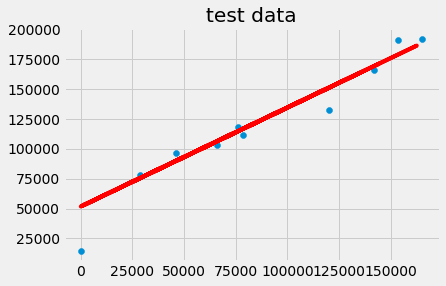

In [20]:
# showing best fitted line on test data
plt.scatter(X_test, y_test)
plt.plot(X_train, regressor.predict(X_train), color = 'red', label = 'best fitted line')
plt.title('test data')
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score

mse = cross_val_score(estimator = regressor, X = X, y = y, cv = 5)
print(f'{mse}\nmean = {mse.mean()}')

[ 0.85141427 -0.82044798 -0.12260688 -1.19015151  0.43880608]
mean = -0.16859720459699407
